# CIND820: Big Data Analytics Project
## Data: Estimation of obesity levels based on eating habits and physical condition
### Initial Coding and Results

For initial coding, following steps were used: 

Step 1: Import libraries 

I imported the necessary required libraries such as Pandas, Numpy, Matplotlib, Scikit-learn, and any other necessary libraries.

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from yellowbrick.features import FeatureImportances
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


#installing dependencies
!pip install xgboost

# Creating a instance of label Encoder.
le = LabelEncoder()
svc = SVC()

import warnings
warnings.filterwarnings("ignore")

Step 2: Load and preprocess data: 


I loaded the data into Jupyter Notebook using the Pandas library, preprocessed including cleaning the data, handling missing values, transforming variables, and normalization. The details are mentioned below:

1. Load the data

In [125]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

#View the data
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


2. Check if there are any missing values

<AxesSubplot:>

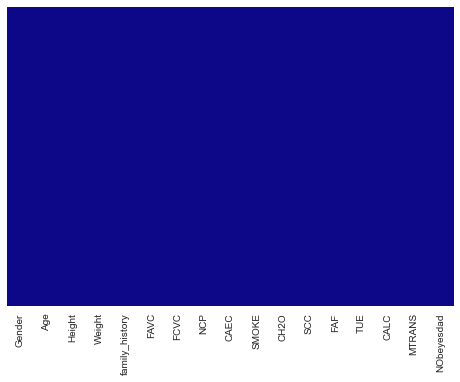

In [126]:
df.shape
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='plasma')

The shape function and heatmapp informed that the data does not have any missing value.

3. Check the duplicate rows

In [127]:
dup_df = df[df.duplicated()]
print(dup_df.shape)

(24, 17)


This shows there are 24 rows of duplicate data. Hence this needs to be removed.

In [128]:
# Remove duplicates 
data = df.drop_duplicates()

4. Check categorical variables

In [129]:
# Checking unique values of categorical variables
cat_col = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for cat in cat_col:
    print(cat)
    print(data[cat].unique())
    print("\n")

Gender
['Female' 'Male']


family_history
['yes' 'no']


FAVC
['no' 'yes']


CAEC
['Sometimes' 'Frequently' 'Always' 'no']


SMOKE
['no' 'yes']


SCC
['no' 'yes']


CALC
['no' 'Sometimes' 'Frequently' 'Always']


MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']




In [130]:
cols=[]
for col in df.head(1):
    cols.append(col)

In [131]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

I converted the categorical features into numerical data. Categories such as CAEC, CALC, family_history and MTRANS follow a set order so this makes sense. The rest are have two classes.

In [132]:
df['NObeyesdad'] = df['NObeyesdad'].map({'Normal_Weight' : 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 1, 'Insufficient_Weight': 0, \
 'Obesity_Type_I' : 2  , 'Obesity_Type_II' : 2, \
 'Obesity_Type_III' : 2 })

In [133]:
df['CAEC'] = df['CAEC'].apply(lambda x: ['no', 'Sometimes', 'Frequently', 'Always'].index(x))
df['SMOKE'] = df['SMOKE'].apply(lambda x: ['yes', 'no'].index(x))
df['SCC'] = df['SCC'].apply(lambda x: ['yes', 'no'].index(x))
df['CALC'] = df['CALC'].apply(lambda x:['no', 'Sometimes', 'Frequently', 'Always'].index(x))
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female': 1})
df['family_history'] = df['family_history'].map({'no' : 0, 'yes': 1})
df['FAVC'] = df['FAVC'].map({'no' : 0, 'yes': 1})
df['MTRANS'] = df['MTRANS'].map({'Public_Transportation': 1, 'Walking':2, 'Automobile':3, 'Motorbike':4, 'Bike':5})
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,1,2.0,1,0.0,1.0,0,1,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,0,3.0,0,3.0,0.0,1,1,0
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,1,2.0,1,2.0,1.0,2,1,0
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,1,2.0,1,2.0,0.0,2,2,1
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,1,2.0,1,0.0,0.0,1,1,1


4. Recognize the highly correlated or uncorrelated variables 

This is an important step that allows to identify the highly coorrelated or uncorelated variable that can be dropped.

In [134]:
#Correlation matrix
df.corr()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,-0.048394,-0.618466,-0.161668,-0.102512,-0.064934,0.274505,-0.067600,0.091543,0.044698,-0.107930,-0.102633,-0.189607,-0.017269,0.007616,-0.164116,-0.042359
Age,-0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,-0.083739,-0.091987,-0.045304,0.116283,-0.144938,-0.296931,0.044487,0.567983,0.308309
Height,-0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,-0.048818,-0.055499,0.213376,0.133753,0.294709,0.051912,0.129732,0.085768,0.144356
Weight,-0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,-0.287493,-0.025746,0.200575,0.201906,-0.051436,-0.071561,0.206677,-0.046615,0.848079
family_history,-0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,-0.169787,-0.017385,0.147437,0.185422,-0.056673,0.022943,-0.036676,0.065036,0.511098
FAVC,-0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.150068,0.050660,0.009719,0.190658,-0.107995,0.068417,0.089520,-0.009102,0.283598
FCVC,0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.054670,-0.014320,0.068461,-0.071852,0.019939,-0.101135,0.060781,-0.065098,0.113146
NCP,-0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.097801,-0.007811,0.057088,0.015624,0.129504,0.036326,0.071747,0.059022,-0.034655
CAEC,0.091543,-0.083739,-0.048818,-0.287493,-0.169787,-0.150068,0.054670,0.097801,1.000000,-0.055282,-0.144995,-0.109179,0.030110,0.048567,-0.047540,-0.003556,-0.367379
SMOKE,0.044698,-0.091987,-0.055499,-0.025746,-0.017385,0.050660,-0.014320,-0.007811,-0.055282,1.000000,0.031995,0.047731,-0.011216,-0.017613,-0.082471,-0.021045,0.002433


<AxesSubplot:>

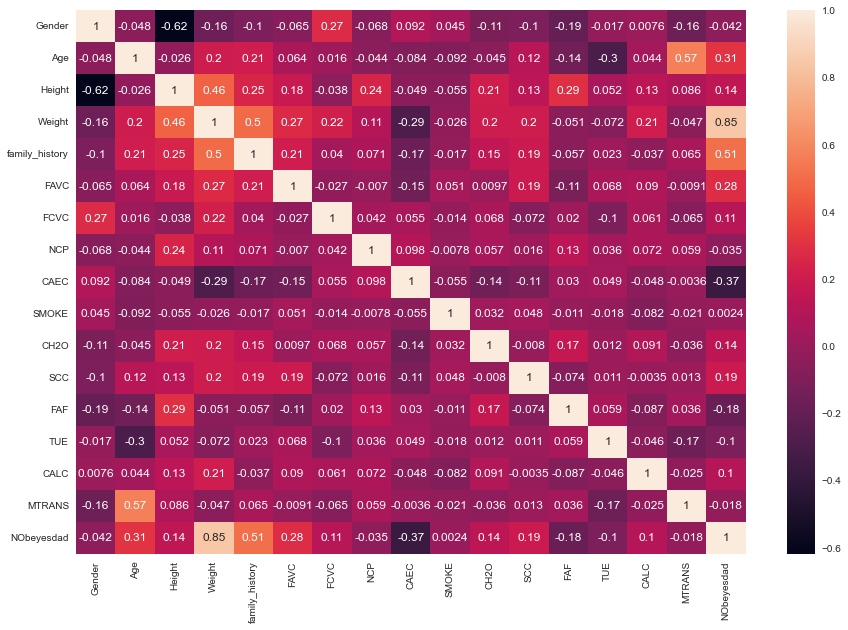

In [135]:
#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

In [136]:
#Drop the weight variable
df.drop(['Weight'],axis = 1, inplace = True)

5. Get the overview of the dataset and describe it.

In [137]:
#Return columns
print(df.keys(), "\n")

#Return array dimensions
print(df.shape, "\n")

#Dataframe summary
df.info()

#Summarize  central tendency, dispersion, and shape of a dataset’s distribution
df.describe()

Index(['Gender', 'Age', 'Height', 'family_history', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object') 

(2111, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   int64  
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   family_history  2111 non-null   int64  
 4   FAVC            2111 non-null   int64  
 5   FCVC            2111 non-null   float64
 6   NCP             2111 non-null   float64
 7   CAEC            2111 non-null   int64  
 8   SMOKE           2111 non-null   int64  
 9   CH2O            2111 non-null   float64
 10  SCC             2111 non-null   int64  
 11  FAF             2111 non-null   float64
 12  TUE             2111 non-null   float64
 13  CALC    

,Gender,Age,Height,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,24.312600,1.701677,0.817622,0.883941,2.419043,2.685628,1.140692,0.979157,2.008011,0.954524,1.010298,0.657866,0.731407,1.488394,1.195642
std,0.500083,6.345968,0.093305,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.868475,0.829035
min,0.000000,14.000000,1.450000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,19.947192,1.630000,1.000000,1.000000,2.000000,2.658738,1.000000,1.000000,1.584812,1.000000,0.124505,0.000000,0.000000,1.000000,0.000000
50%,0.000000,22.777890,1.700499,1.000000,1.000000,2.385502,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.625350,1.000000,1.000000,1.000000
75%,1.000000,26.000000,1.768464,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.477420,1.000000,1.666678,1.000000,1.000000,2.000000,2.000000
max,1.000000,61.000000,1.980000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,5.000000,2.000000


6. Normalise the data

In [138]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(df)
cols = ['Gender', 'Age', 'Height', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
normalizedData = pd.DataFrame(normalizedData, columns=cols)
print(normalizedData.head())

   Gender       Age    Height  family_history  FAVC  FCVC       NCP      CAEC  \
0     1.0  0.148936  0.320755             1.0   0.0   0.5  0.666667  0.333333   
1     1.0  0.148936  0.132075             1.0   0.0   1.0  0.666667  0.333333   
2     0.0  0.191489  0.660377             1.0   0.0   0.5  0.666667  0.333333   
3     0.0  0.276596  0.660377             0.0   0.0   1.0  0.666667  0.333333   
4     0.0  0.170213  0.622642             0.0   0.0   0.5  0.000000  0.333333   

   SMOKE  CH2O  SCC       FAF  TUE      CALC  MTRANS  NObeyesdad  
0    1.0   0.5  1.0  0.000000  0.5  0.000000    0.00         0.0  
1    0.0   1.0  0.0  1.000000  0.0  0.333333    0.00         0.0  
2    1.0   0.5  1.0  0.666667  0.5  0.666667    0.00         0.0  
3    1.0   0.5  1.0  0.666667  0.0  0.666667    0.25         0.5  
4    1.0   0.5  1.0  0.000000  0.0  0.333333    0.00         0.5  


7. Split the data into training and testing sets.

In [139]:
#Store the feature and target variable 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# X represents all the features in df, except for the last column, 
# y represents only the last column of df, which is the target variable.

print(df.shape)
print(X.shape)
print(y.shape)

#Partition the data into training and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2111, 16)
(2111, 15)
(2111,)
(1477, 15)
(634, 15)
(1477,)
(634,)


<Figure size 576x360 with 0 Axes>

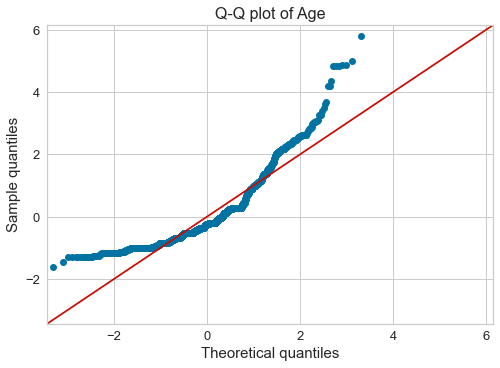

<Figure size 576x360 with 0 Axes>

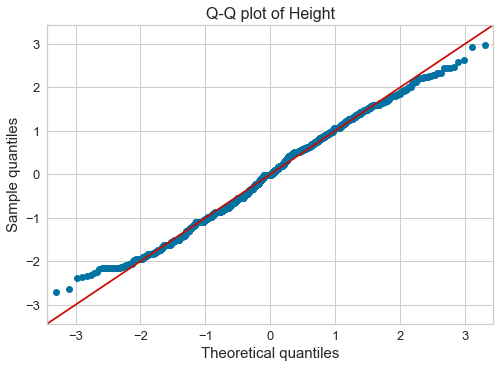

In [140]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
df_norm=df[['Age','Height']]

for c in df_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(df_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

<AxesSubplot:ylabel='Frequency'>

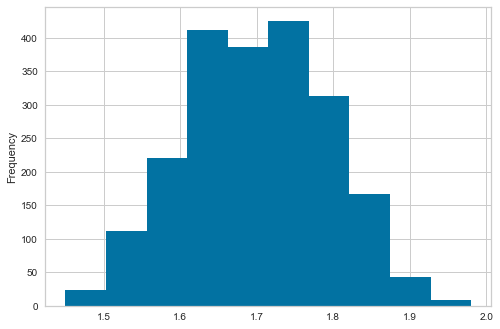

In [141]:
df["Height"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

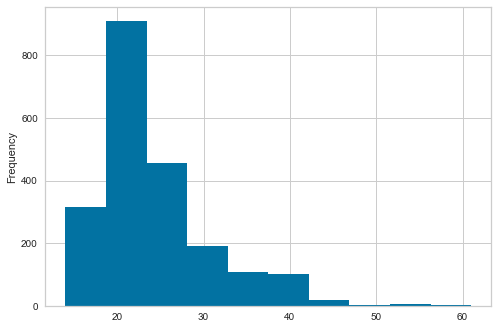

In [142]:
df["Age"].plot(kind = 'hist')

# Baseline classification accuracy

In [143]:
# Compute the baseline classification accuracy for X_train
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.45425867507886436


# Select the appropriate predictive model

I selected the following models:

    1. Random Forest 
    2. Logistic Regression
    3. SGBoost
    4. Decision Tree
    5. K Nearest Neighbout (KNN)

I used the training data to train the selected model. This also involved fitting the model to the training data.
Then I used the test data to evaluate the performance of the model. 
This includes measuring the model's accuracy, precision, recall and F1 score. I also performed cross-validation to evaluate the performance of a model as it helps to :
1. reduce the variance in the estimate of the model's performance by using multiple test sets, 
2. provide a more reliable estimate of the model's performance because it uses all the available data for training and testing
3. help to identify any problems with the model by comparing the performance on the training and test sets and 
4. improve the reliability and generalizability of the model.

The findings are given below:

### 1: Random Forest

In [144]:
# Create a Random Forest classifier with default parameters

model_rf = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model_rf.predict(X_test)

# Calculate the accuracy, precision, recall and F1 of the classifier
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
f1_rf= f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.4f}".format(accuracy_rf))
print("Precision: {:.4f}".format(precision_rf))
print("Recall: {:.4f}".format(recall_rf))
print("F1 score: {:.4f}".format(f1_rf))

Accuracy: 0.8991
Precision: 0.9014
Recall: 0.8991
F1 score: 0.8990


In [199]:
# Perform cross Validation 

# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
rf_cv = cross_val_score(model_rf, X, y, scoring='accuracy', cv=kfold)
rf_cv

# Print the cross-validation scores
print("Cross-validation scores:", rf_cv)

# Print mean cross-validation score
print("Mean:", np.mean(rf_cv))

Cross-validation scores: [0.89150943 0.90521327 0.90047393 0.93364929 0.90995261 0.88625592
 0.91469194 0.86255924 0.91943128 0.93838863]
Mean: 0.9062125547706341


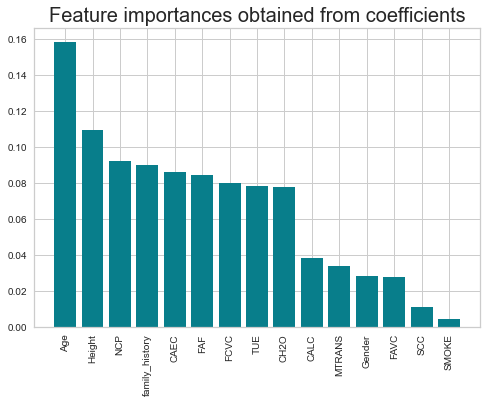

In [146]:
# Importance rankings
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame(data={
   'Attribute': X_test.columns,
   'Importance': model_rf.feature_importances_
})

# Sort feature importances in descending order
importances = importances.sort_values(by='Importance', ascending=False)

# Create plot
plt.figure()

# Add bars
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')

# Create plot title
plt.title('Feature importances obtained from coefficients', size=20)

# Add feature names as x-axis labels
plt.xticks(rotation='vertical')

# Show plot
plt.show()

### 2: Logistic regression

In [147]:
# Create a Logistic Regression classifier with default parameters
model_lr = LogisticRegression(random_state=42)

# Fit the classifier to the training data
model_lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model_lr.predict(X_test)

# Calculate the accuracy, precision, recall and F1 of the classifier
accuracy_lr= accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test, y_pred, average='weighted')
f1_lr= f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.4f}".format(accuracy_lr))
print("Precision: {:.4f}".format(precision_lr))
print("Recall: {:.4f}".format(recall_lr))
print("F1 score: {:.4f}".format(f1_lr))

Accuracy: 0.7066
Precision: 0.6903
Recall: 0.7066
F1 score: 0.6815


In [200]:
# Perform cross Validation 

# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross validation
lr_cv = cross_val_score(model_lr, X, y, scoring='accuracy', cv=kfold)
lr_cv

# Print the cross-validation scores
print ("Cross validation scores: ",lr_cv)

# Print mean cross-validation score
print("Mean: ", np.mean(lr_cv))

Cross validation scores:  [0.70754717 0.70616114 0.69194313 0.66824645 0.66350711 0.7014218
 0.63507109 0.68246445 0.68720379 0.72037915]
Mean:  0.6863945274076724


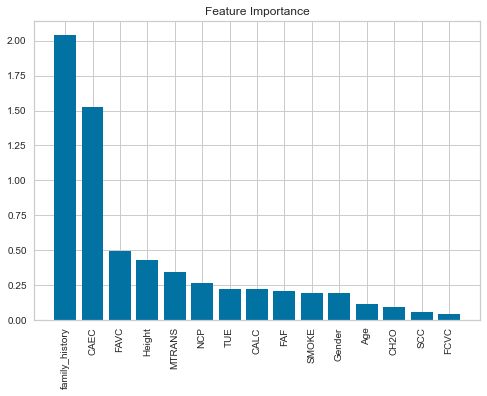

In [149]:
# Feature importances 
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

# Get feature importances
importances = np.abs(model_lr.coef_)[0]

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

###  3: XGBoost

In [150]:
# Create XGBoost classifier with default parameters
model_xgb = XGBClassifier()

# Fit the classifier to the training data
model_xgb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model_xgb.predict(X_test)

# Calculate the accuracy, precision, recall and F1 of the classifier
accuracy_xg = accuracy_score(y_test, y_pred)
precision_xg = precision_score(y_test, y_pred, average='weighted')
recall_xg = recall_score(y_test, y_pred, average='weighted')
f1_xg = f1_score(y_test, y_pred, average='weighted')


print("Accuracy: {:.4f}".format(accuracy_xg))
print("Precision: {:.4f}".format(precision_xg))
print("Recall: {:.4f}".format(recall_xg))
print("F1 score: {:.4f}".format(f1_xg))

Accuracy: 0.8864
Precision: 0.8872
Recall: 0.8864
F1 score: 0.8866


In [201]:
# Perform cross Validation 

# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
xg_cv = cross_val_score(model_xgb, X, y, cv=kfold)
xg_cv

# Print the cross-validation scores
print("Cross-validation scores:", xg_cv)

# Print mean cross-validation score
print("Mean:", np.mean(xg_cv))

Cross-validation scores: [0.87735849 0.91943128 0.88625592 0.92417062 0.8957346  0.87677725
 0.91943128 0.87203791 0.92417062 0.95260664]
Mean: 0.9047974604310113


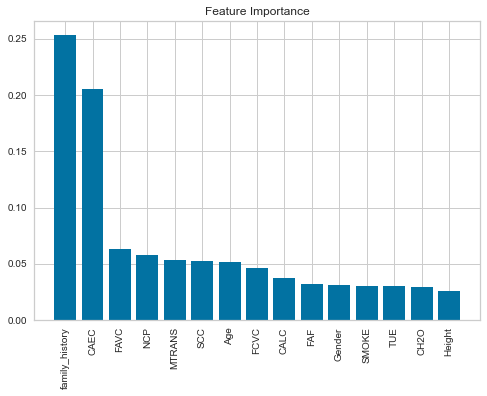

In [202]:
# Get feature importances
importances = model_xgb.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()


 ### 4: Decision Tree

In [119]:
# Create a decision tree classifier with default parameters
dtc = DecisionTreeClassifier()

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dtc.predict(X_test)

# Calculate the accuracy, precision, recall and F1 of the classifier
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
f1_dt = f1_score(y_test, y_pred, average='weighted')


print("Accuracy: {:.4f}".format(accuracy_dt))
print("Precision: {:.4f}".format(precision_dt))
print("Recall: {:.4f}".format(recall_dt))
print("F1 score: {:.4f}".format(f1_dt))

Accuracy: 0.8028
Precision: 0.8013
Recall: 0.8028
F1 score: 0.8019


In [203]:
# Perform cross Validation 

# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
dt_cv = cross_val_score(dtc, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", dt_cv)

# Print mean cross-validation score
print("Mean:", np.mean(dt_cv))

Cross-validation scores: [0.78301887 0.79146919 0.81990521 0.79620853 0.81990521 0.74881517
 0.81990521 0.82938389 0.82938389 0.81042654]
Mean: 0.8048421711526424


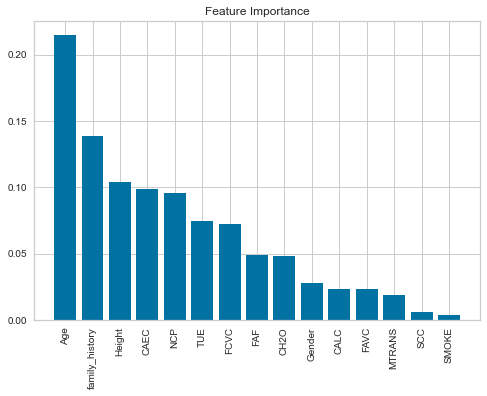

In [73]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Get feature importances
importances = dtc.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

### 5: K Nearest Neighbors (KNN)

In [195]:
# create KNN classifier with k=
knc = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knc.predict(X_test)

# Calculate the accuracy, precision, recall and F1 of the classifier
accuracy_kn = accuracy_score(y_test, y_pred)
precision_kn = precision_score(y_test, y_pred, average='weighted')
recall_kn = recall_score(y_test, y_pred, average='weighted')
f1_kn = f1_score(y_test, y_pred, average='weighted')


print("Accuracy: {:.4f}".format(accuracy_kn))
print("Precision: {:.4f}".format(precision_kn))
print("Recall: {:.4f}".format(recall_kn))
print("F1 score: {:.4f}".format(f1_kn))

Accuracy: 0.8170
Precision: 0.8200
Recall: 0.8170
F1 score: 0.8134


In [204]:
# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
kn_cv = cross_val_score(knc, X, y, cv=kfold)
kn_cv

# Print the cross-validation scores
print("Cross validation scores:", kn_cv)

# Print mean cross-validation score
print("Mean:", np.mean(kn_cv))

Cross validation scores: [0.83962264 0.82938389 0.80094787 0.8436019  0.8056872  0.76777251
 0.8056872  0.81042654 0.85308057 0.87203791]
Mean: 0.8228248233926495


In [76]:
# Fit the KNN classifier on the entire dataset
knc.fit(X_train, y_train)

# Compute feature importances using permutation importance
importances = permutation_importance(knc, X_train, y_train)

# Print the feature importances
for feature, importance in zip(X.columns, importances.importances_mean):
    print(f"{feature}: {importance}")

Gender: 0.03710223425863237
Age: 0.3647935003385241
Height: 0.00027081922816523106
family_history: 0.023967501692620206
FAVC: 0.014353419092755625
FCVC: 0.03628977657413681
NCP: 0.07312119160460398
CAEC: 0.027623561272850417
SMOKE: 0.0
CH2O: 0.028571428571428602
SCC: 0.003114421123899813
FAF: 0.061069735951252556
TUE: 0.0421123899796886
CALC: 0.02329045362220721
MTRANS: 0.07014218009478679


In [77]:
# Another method
knc.fit(X_train, y_train)

# Create SelectKBest object with f_classif score function and the number of features to select
knc_selector = SelectKBest(score_func=f_classif, k=5)

# Fit the SelectKBest object to the data
knc_selector.fit(X_train, y_train)

# Print the scores and rankings of the features
print(knc_selector.scores_)
print(knc_selector.get_support(indices=True))

selected_features = df.columns[knc_selector.get_support(indices=True)]
print(selected_features)


[  7.25956298  91.47014815  14.66013186 278.61098222  59.13482969
  27.76753746  15.83580331 180.49168132   0.56341073  13.61767899
  29.39838297  29.91795767   9.01541155  10.25426665   5.73789924]
[ 1  3  4  7 11]
Index(['Age', 'family_history', 'FAVC', 'CAEC', 'FAF'], dtype='object')


# Comparing the models

In [194]:
print("Random_Forest", "Accuracy: {:.4f}".format(accuracy_rf), ("Precision: {:.4f}".format(precision_rf)), ("Recall: {:.4f}".format(recall_rf)), ("F1 score: {:.4f}".format(f1_rf)),("Cross_Validation:{:.4f}".format(np.mean(rf_cv))))
print("Logistc_Regre", "Accuracy: {:.4f}".format(accuracy_lr), ("Precision: {:.4f}".format(precision_lr)), ("Recall: {:.4f}".format(recall_lr)), ("F1 score: {:.4f}".format(f1_lr)),("Cross_Validation:{:.4f}".format(np.mean(lr_cv))))
print("XGBoost      ", "Accuracy: {:.4f}".format(accuracy_xg), ("Precision: {:.4f}".format(precision_xg)), ("Recall: {:.4f}".format(recall_xg)), ("F1 score: {:.4f}".format(f1_xg)),("Cross_Validation:{:.4f}".format(np.mean(xg_cv))))
print("DecisionTree ", "Accuracy: {:.4f}".format(accuracy_dt), ("Precision: {:.4f}".format(precision_dt)), ("Recall: {:.4f}".format(recall_dt)), ("F1 score: {:.4f}".format(f1_dt)),("Cross_Validation:{:.4f}".format(np.mean(dt_cv))))
print("KNNeighbors  ", "Accuracy: {:.4f}".format(accuracy_kn), ("Precision: {:.4f}".format(precision_kn)), ("Recall: {:.4f}".format(recall_kn)), ("F1 score: {:.4f}".format(f1_kn)),("Cross_Validation:{:.4f}".format(np.mean(kn_cv))))

Random_Forest Accuracy: 0.8991 Precision: 0.9014 Recall: 0.8991 F1 score: 0.8990 Cross_Validation:0.8879
Logistc_Regre Accuracy: 0.7066 Precision: 0.6903 Recall: 0.7066 F1 score: 0.6815 Cross_Validation:0.6604
XGBoost       Accuracy: 0.8864 Precision: 0.8872 Recall: 0.8864 F1 score: 0.8866 Cross_Validation:0.9048
DecisionTree  Accuracy: 0.8028 Precision: 0.8013 Recall: 0.8028 F1 score: 0.8019 Cross_Validation:0.8110
KNNeighbors   Accuracy: 0.8170 Precision: 0.8200 Recall: 0.8170 F1 score: 0.8134 Cross_Validation:0.8144


### Results

Based on this comparison, I can make following observations:

XGBoost: XGBoost has the highest cross-validation mean score of 0.9048, indicating that the model generalizes well on unseen data. It also has high accuracy, precision, recall, and F1 score, which suggests that it performs well on the test data.

Random Forest: Random Forest has the second-highest cross-validation mean score of 0.8879, and high accuracy, precision, recall, and F1 score. This indicates that it is a strong performer on the test data.

K-Nearest Neighbors: K-Nearest Neighbors has a cross-validation score of 0.8144, which is relatively high compared to the other models. It also has high accuracy, precision, recall, and F1 score, which suggests that it performs well on the test data.

Decision Tree: Decision Tree has a cross-validation score of 0.8110, which is slightly lower than the other models. It has relatively high accuracy, precision, recall, and F1 score, but not as high as the top-performing models.

Logistic Regression: Logistic Regression has the lowest cross-validation mean score of 0.6604, and relatively low accuracy, precision, recall, and F1 score. This indicates that it may not perform as well as the other models on the test data.

Overall, XGBoost and Random Forest are the top-performing models based on the reported metrics. However, the choice of evaluation metric and the size and quality of the data can affect the model performance.